In [256]:
# Importando librerias necesarias
import cv2 as cv
import numpy as np
import skimage as sk
import skimage.morphology as mo
import skimage.data as data
import skimage.util as util
from skimage.morphology import skeletonize


from matplotlib import pyplot as plt
from skimage.filters import thresholding as th
from skimage import morphology as mp

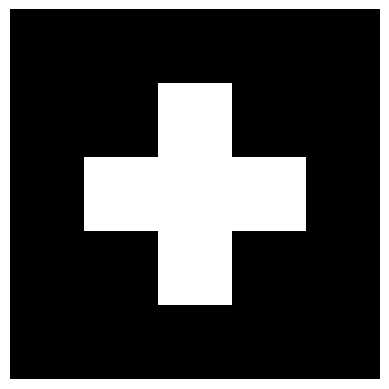

In [257]:
def cross(r = 3):
    x = np.zeros((r, r)).astype(int)
    x[r // 2, :] = 1
    x[:, r // 2] = 1
    x = np.pad(x, [1,1])
    return x

plt.imshow(cross(), cmap='gray')
plt.axis('off')
plt.show()

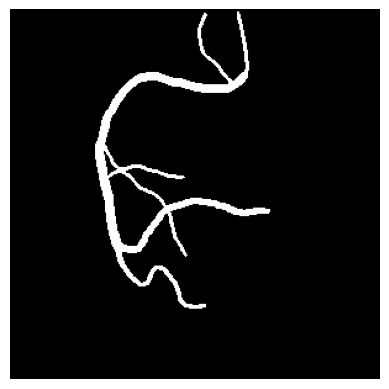

In [258]:
image_path = 'images/1_gt.pgm'
imagen_color = cv.imread(image_path)
imagen_gris = cv.cvtColor(imagen_color, cv.COLOR_BGR2GRAY)
_, binary_image = cv.threshold(imagen_gris, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

plt.imshow(binary_image, cmap='gray')
plt.axis('off')
plt.show()

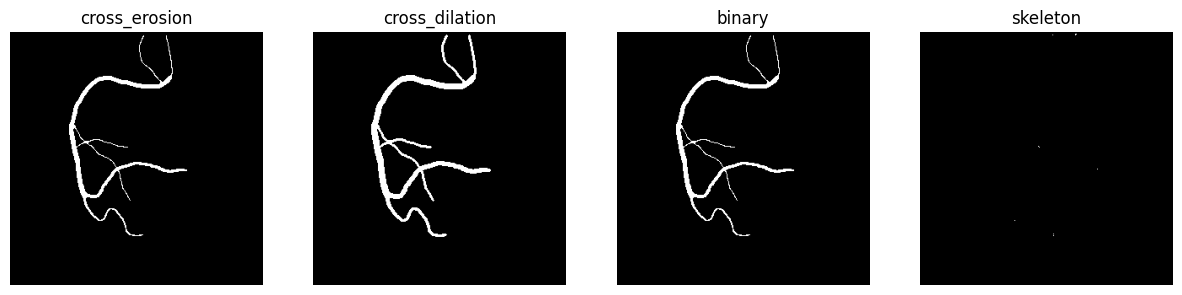

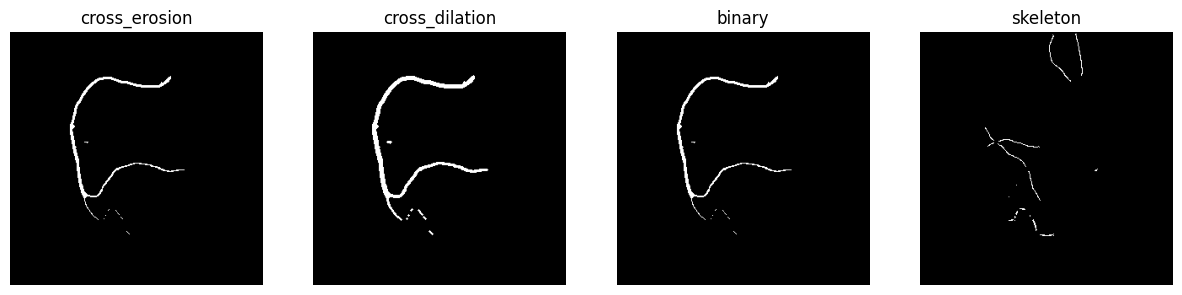

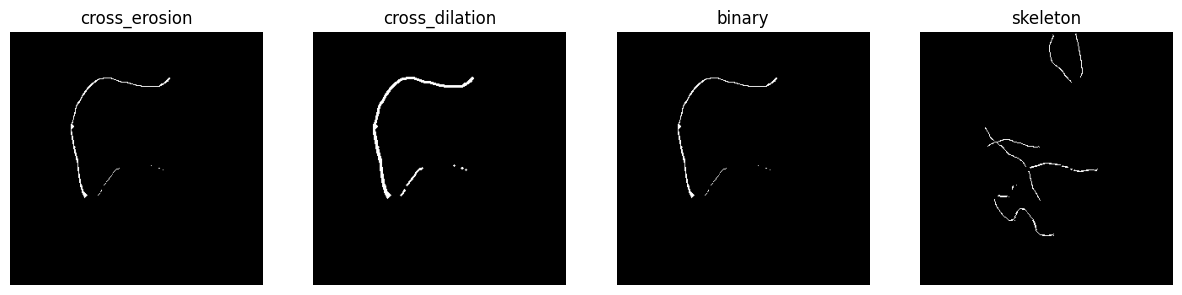

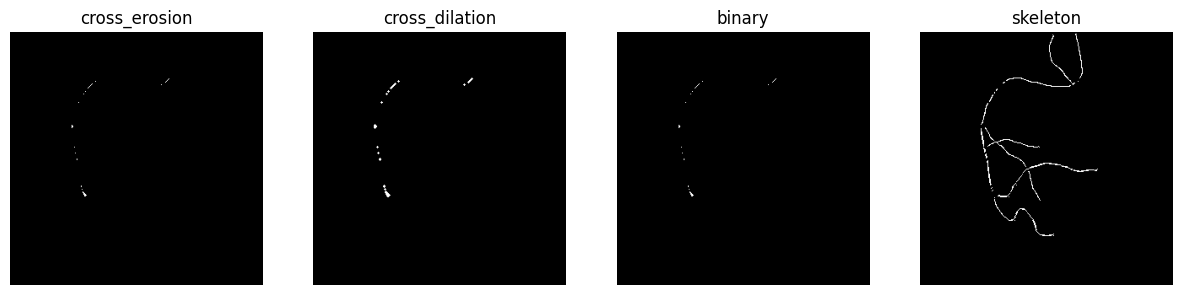

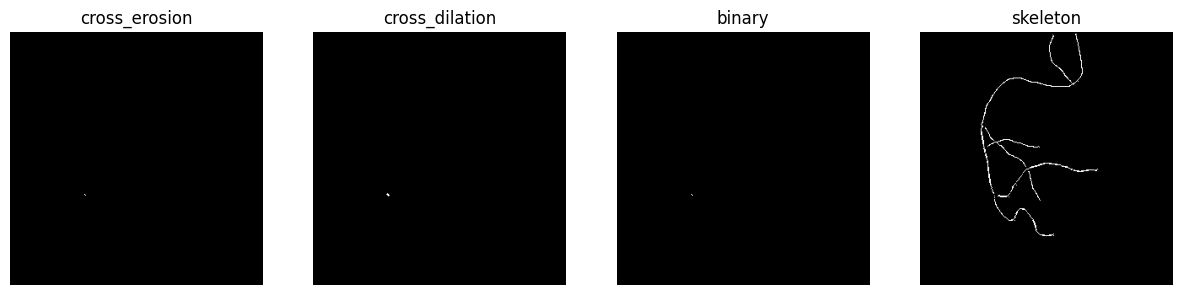

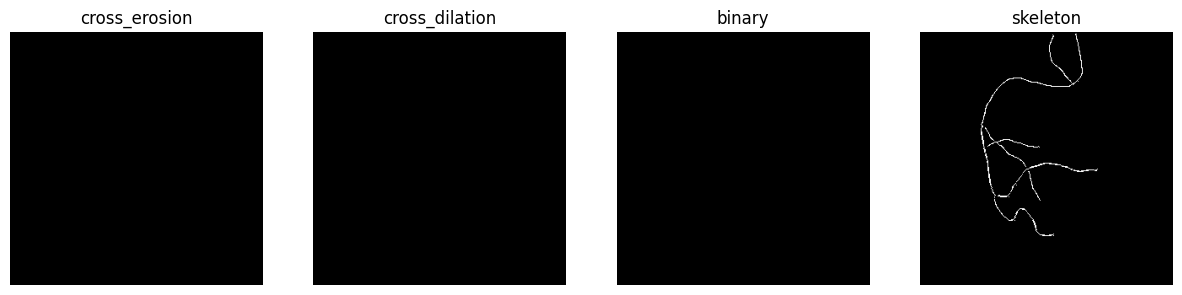

In [259]:
binary_img_copy = binary_image.copy()
skeleton = np.zeros(binary_img_copy.shape).astype(np.uint8)

cross_erosions = []
cross_dilations = []
binaries = []
skeletons = []

flag = True
while flag:

    cr = cross(3)
    # cross_opening
    cross_erosion = mp.erosion(binary_img_copy, cr)
    cross_erosions.append(cross_erosion)
    cross_dilation = mp.dilation(cross_erosion, cr)
    cross_dilations.append(cross_dilation)

    img_subtraction = binary_img_copy - cross_dilation
    skeleton = np.bitwise_or(skeleton, img_subtraction)
    skeletons.append(skeleton)
    
    cross_erosion = mp.erosion(binary_img_copy, cr)
    binary_img_copy = cross_erosion
    binaries.append(binary_img_copy)

    if np.sum(binary_img_copy) == 0: flag = False


for i in range(len(cross_erosions)):

    plt.figure(figsize=(15, 5))

    plt.subplot(1, 4, 1)
    plt.imshow(cross_erosions[i], cmap='gray')
    plt.axis('off')
    plt.title('cross_erosion')

    plt.subplot(1, 4, 2)
    plt.imshow(cross_dilations[i], cmap='gray')
    plt.axis('off')
    plt.title('cross_dilation')

    plt.subplot(1, 4, 3)
    plt.imshow(binaries[i], cmap='gray')
    plt.axis('off')
    plt.title('binary')

    plt.subplot(1, 4, 4)
    plt.imshow(skeletons[i], cmap='gray')
    plt.axis('off')
    plt.title('skeleton')

    plt.show()





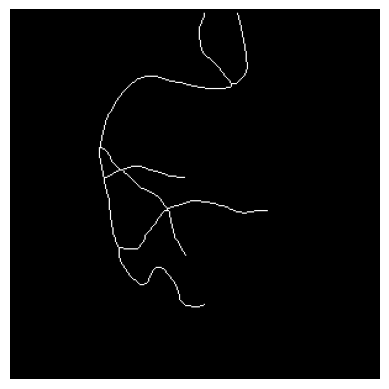

In [260]:
from skimage.morphology import skeletonize

skeleton = skeletonize(binary_image)
plt.imshow(skeleton, cmap='gray')
plt.axis('off')
plt.show()

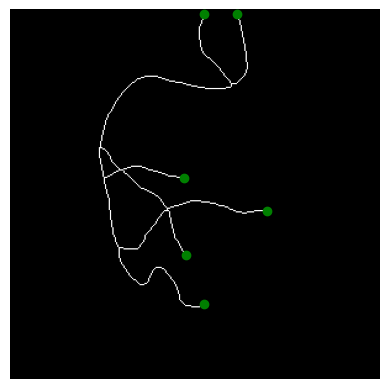

In [261]:

all_nodes_list = []
for i in range(1, skeleton.shape[0] - 1):
    for j in range(1, skeleton.shape[1] - 1):
        if skeleton[i, j] == 1: all_nodes_list.append((i, j))

extreme_nodes_list = []
for i in range(1, skeleton.shape[0] - 1):
    for j in range(1, skeleton.shape[1] - 1):
        if skeleton[i, j] == 1:
            if np.sum(skeleton[i-1:i+2, j-1:j+2]) == 2:
                extreme_nodes_list.append((i, j))


plt.imshow(skeleton, cmap='gray')
plt.plot([node[1] for node in extreme_nodes_list], [node[0] for node in extreme_nodes_list], 'go')
plt.axis('off')
plt.show()

In [262]:
all_nodes_list

[(3, 157),
 (3, 184),
 (4, 157),
 (4, 184),
 (5, 157),
 (5, 185),
 (6, 157),
 (6, 185),
 (7, 156),
 (7, 185),
 (8, 156),
 (8, 185),
 (9, 155),
 (9, 186),
 (10, 155),
 (10, 186),
 (11, 155),
 (11, 186),
 (12, 154),
 (12, 186),
 (13, 154),
 (13, 187),
 (14, 153),
 (14, 187),
 (15, 153),
 (15, 187),
 (16, 153),
 (16, 187),
 (17, 153),
 (17, 187),
 (18, 153),
 (18, 188),
 (19, 153),
 (19, 188),
 (20, 153),
 (20, 188),
 (21, 153),
 (21, 188),
 (22, 153),
 (22, 188),
 (23, 153),
 (23, 189),
 (24, 153),
 (24, 189),
 (25, 154),
 (25, 189),
 (26, 154),
 (26, 189),
 (27, 154),
 (27, 189),
 (28, 154),
 (28, 190),
 (29, 154),
 (29, 190),
 (30, 154),
 (30, 190),
 (31, 155),
 (31, 190),
 (32, 155),
 (32, 190),
 (33, 155),
 (33, 190),
 (34, 156),
 (34, 191),
 (35, 156),
 (35, 191),
 (36, 157),
 (36, 191),
 (37, 158),
 (37, 191),
 (38, 159),
 (38, 191),
 (39, 160),
 (39, 161),
 (39, 191),
 (40, 162),
 (40, 191),
 (41, 163),
 (41, 191),
 (42, 164),
 (42, 191),
 (43, 165),
 (43, 192),
 (44, 166),
 (44, 